# COMP_2704: Supervised Machine Learning
## Final Project
### Jasleen Kaur
> **Use Case and Data Selection: Requirements**

> **Decision Tree**

> **Support Vector Machine**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC

# Use Case and Data Selection: Requirements

## Question 1

**Realistic use case for data with at least three classes, written in markdown. Provide a description of each feature in the data set.**

## Answer 1

The heart failure clinical data can be used to develop a predictive model based on their risk of heart failure: low-risk, medium-risk, high-risk.

1. low-risk - intensive care and treatment
2. medium-risk - medication management, lifestyle changes, close monitoring
3. high-risk - frequent monitoring, lifestyle modyfications, early treatment

This dataset contains **299 records** and **12 features** that can be used to predict mortality by heart failure.

Following are the 12 features of this dataset:

1. age (45 to 90) - age of the patient in years
2. anaemia - decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase - level of the CPK enzyme in the blood (mcg/L)
4. diabetes - if the patient has diabetes (boolean)
5. ejection_fraction - percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure - if the patient has hypertension (boolean)
7. platelets - platelets in the blood (kiloplatelets/mL)
8. serum_creatinine - level of serum creatinine in the blood (mg/dL)
9. serum_sodium - level of serum sodium in the blood (mEq/L)
10. sex - woman or man (binary)
11. smoking - if the patient smokes or not (boolean)
12. time - follow-up period (days)

The prediction is the DEATH_EVENT, which is either 1(yes) or 0(no) - if the patient died during the follow-up period (boolean)

## Question 2

**Discussion of prediction errors. Are false positives or negatives for one of the classes to be avoided? Or are all errors equally bad?**

## Answer 2

**False Positive:** Actually low-risk, Predicted high-risk.

**False Negative:** Actually high-risk, Predicted low-risk.

According to me, after having a clear understanding of the data, I think that false negatives are generally more concerning than the false positives. On the other hand, false positives means that treating low-risk patients with extra care, testing.
Therefore, the model should be optimized to minimize false negatives.

## Question 3

**Data cleaning, with check that it is clean using Pandas. Save the data as a CSV file for later use.**

## Answer 3

In [2]:
# load data into pandas dataframe called df
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# checking if there is any datatype other than int or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# saving the data as csv file
df.to_csv('heart_failure_data.csv', index = False)

## Question 4

**Statistical or categorical description using the Pandas describe function. Provide written observations.**

## Answer 4

In [5]:
# description of the data using pandas describe function
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Observations**

By using the pandas describe function, I can conclude that:
1. There are 299 records for each of the feature.
2. The mean, standard deviation, minimum value, 25%, 50% & 75% of each feature, and the maximum value of each feature is displayed.

## Question 5

**Bar graph showing the count of each class. Provide written observations.**

## Answer 5

Text(0.5, 1.0, 'Death Event v/s Count of the Patients')

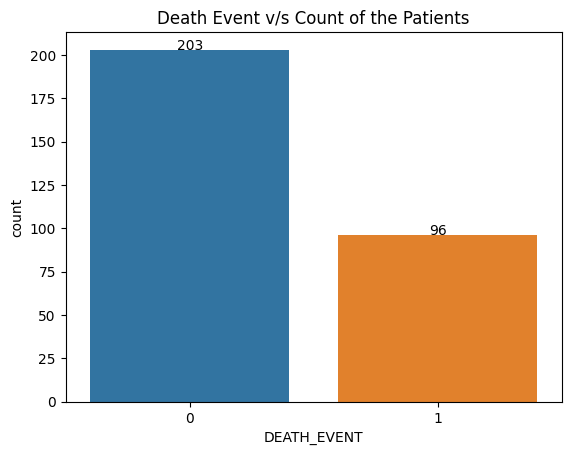

In [6]:
# using countplot to plot the bar graph of the class 
sb.countplot(data = df, x = 'DEATH_EVENT')

# count the exact number of patients
counts = df['DEATH_EVENT'].value_counts()

# printing the count for each event
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha = 'center')
    
# giving title to the bar graph
plt.title('Death Event v/s Count of the Patients')

In [7]:
# check the exact number of patients who experienced death or not
# count = df['DEATH_EVENT'].value_counts()
# print(count)

**Observations**

In this bar graph, 0 represents that the patients did not experience death, whereas 1 represents that the patients experienced death. So, according to this graph, 203 patients did not experience death, whereas 96 patients experienced death.

# Decision Tree

## Question 1

**Split the data into training, validation, and testing sets. Try different proportions and justify the final choices.**

Splitting the data into training/validation/testing sets is in the following cells.

**Justification**

Using 80%/10%/10% criteria for splitting as the dataset is not too large, and so that it will give more in training the data.

## Question 2

**Try both Gini impurity index and Entropy as a condition for splitting branches. Experiment with different values of max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split, and any other hyperparameters you wish. Keep your best two (or more) models.**

## Answer 2

In [8]:
X = features = df.drop(['DEATH_EVENT'], axis =1)
Y = labels = df['DEATH_EVENT']

### First Decision Tree

In [9]:
X_train, X_validation_test, Y_train, Y_validation_test =train_test_split(X, Y, test_size=0.2)
X_validation, X_test, Y_validation, Y_test =train_test_split(X_validation_test, Y_validation_test, test_size=0.5)

In [10]:
dt_1 = DecisionTreeClassifier(criterion = 'gini', max_depth=3, max_features=3
                              , min_impurity_decrease=0.0, min_samples_leaf=5
                              , min_samples_split=5,random_state=12)

In [11]:
dt_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=5,
                       min_samples_split=5, random_state=12)

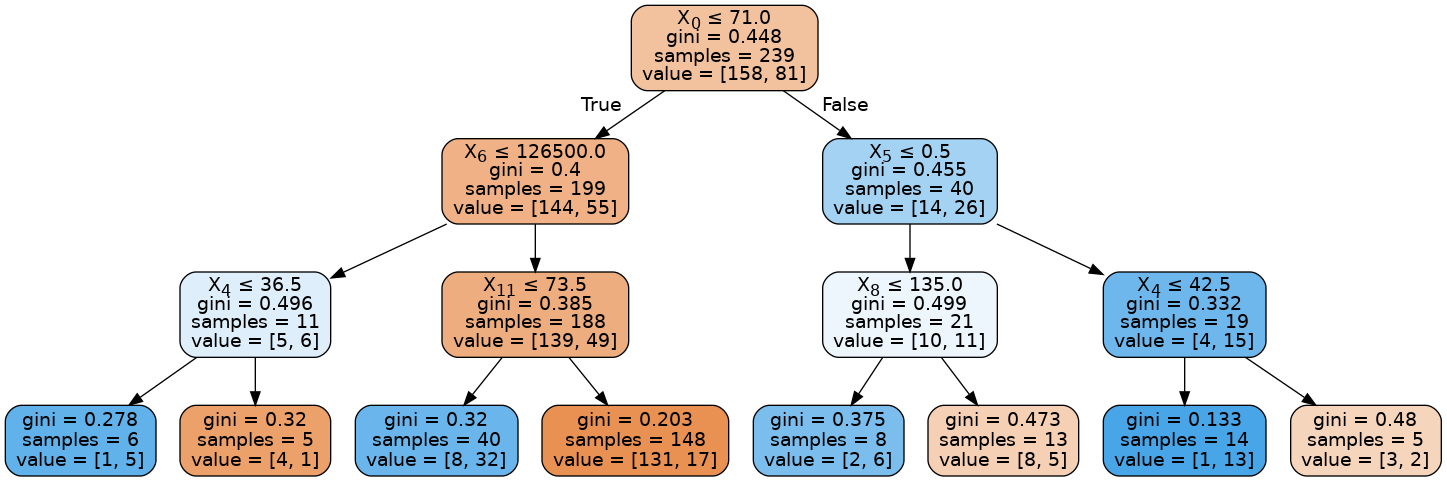

In [12]:
# display first decision tree model
utils.display_tree(dt_1)

In [13]:
dt_1.score(X_validation, Y_validation)

0.8333333333333334

### Second Decision Tree

In [14]:
dt_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, max_features=3
                              , min_impurity_decrease=0.0, min_samples_leaf=5
                              , min_samples_split=5,random_state=12)

In [15]:
dt_2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=3,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=12)

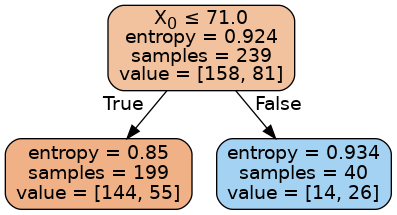

In [16]:
# display second decision tree model
utils.display_tree(dt_2)

In [17]:
dt_2.score(X_validation, Y_validation)

0.8333333333333334

## Question 3

**On your best decision tree models, use the classification_report and confusion_matrix functions in sklearn to display metrics, using training and validation (but not testing) data. Also use the display_tree method in utils.py to display each tree.**

## Answer 3

In [18]:
dt_3 = GridSearchCV(DecisionTreeClassifier(random_state=12),param_grid={
      'criterion':['gini','entropy']
    , 'max_depth':[1,3,5,7,9] 
    , 'min_samples_leaf': [3,4,7,5]
    , 'min_samples_split': [5,1,2]
})

In [19]:
dt_3.fit(X_train, Y_train)

/home/kaur_j/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kaur_j/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kaur_j/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/home/kaur_j/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an inte

GridSearchCV(estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [3, 4, 7, 5],
                         'min_samples_split': [5, 1, 2]})

In [20]:
# according to grid search
dt_3.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

With the help of GridSearchCV module, it is clear that the best parameter to classify the best decision tree model is when we use the criteria as 'gini'.

In [21]:
best_hyper = dt_3.best_estimator_

best_hyper.score(X_validation, Y_validation)

0.8666666666666667

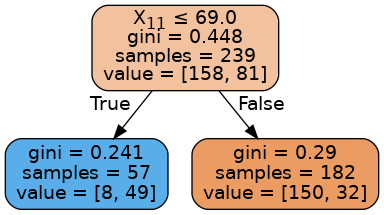

In [22]:
utils.display_tree(best_hyper)

In [23]:
# prediction on validation and training set
Y_val_pred = dt_1.predict(X_validation)
Y_train_pred = dt_1.predict(X_train)

### Training accuracies 

In [24]:
# display the classification report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       158
           1       0.82      0.69      0.75        81

    accuracy                           0.85       239
   macro avg       0.84      0.81      0.82       239
weighted avg       0.84      0.85      0.84       239



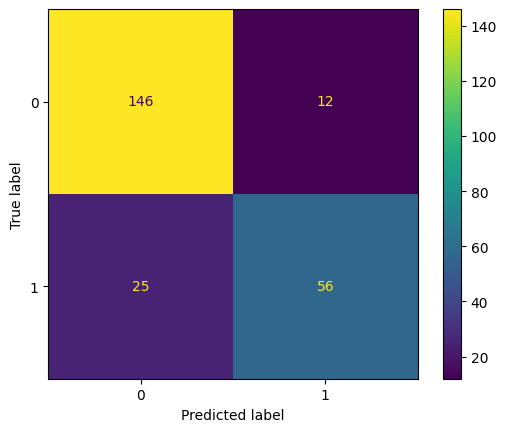

In [25]:
# display the confusion matrix
con_mat = confusion_matrix(Y_train, Y_train_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = dt_1.classes_)
disp.plot()
plt.show()

### Validation accuracies 

In [26]:
# display the classification report
print(classification_report(Y_validation, Y_val_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.56      0.83      0.67         6

    accuracy                           0.83        30
   macro avg       0.75      0.83      0.78        30
weighted avg       0.87      0.83      0.84        30



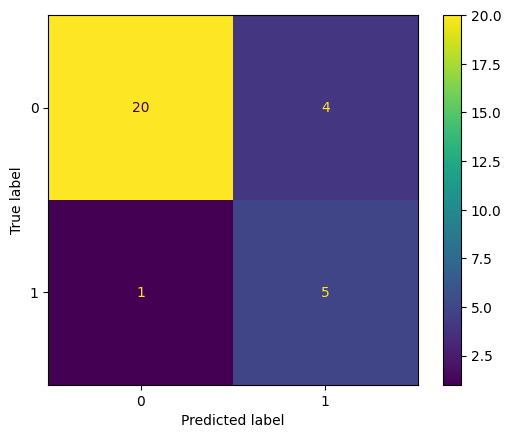

In [27]:
# display the confusion matrix
con_mat = confusion_matrix(Y_validation, Y_val_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = dt_1.classes_)
disp.plot()
plt.show()

## Question 4

**Select and justify your final choice of hyperparameters based on the training and validation metrics. Provide a written analysis in markdown.**

## Answer 4

The final choice of hyperparameters based on the training and validation metrics are {'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 5}
 
This can be surely confirmed, as the best model was choosen with the help of GridSearchCV module.

# Support Vector Machine

## Question 2

**Experiment with different values of the C parameter; try the linear, rbf (with different choices of gamma) and polynomial kernels (with different degrees); try both options for decision_function_shape. Keep your best two models.**

## Answer 2

kernel = linear

In [28]:
svm_1 = SVC(kernel = 'linear')
svm_1.fit(X_train, Y_train)

SVC(kernel='linear')

In [29]:
svm_1.score(X_validation, Y_validation)

0.8666666666666667

In [30]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(X_train, Y_train)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(X_validation, Y_validation))

C = 0.01
Accuracy: 0.8333333333333334


In [ ]:
# C = 400
svm_c_400 = SVC(kernel='linear', C=400)
svm_c_400.fit(X_train, Y_train)
print("C = 400")
print("Accuracy:", svm_c_400.score(X_validation, Y_validation))

In [ ]:
# gamma = 1
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(X_train, Y_train)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))

In [ ]:
# gamma = 10
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(X_train, Y_train)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))

In [ ]:
# Degree = 2
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(X_train, Y_train)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(X_validation, Y_validation))

In [ ]:
# Degree = 4
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(X_train, Y_train)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(X_validation, Y_validation))

In [ ]:
svm_1.SVC(decision_function_shape ='ovo' )

## Question 3

**Use the classification_report and confusion_matrix functions in sklearn todisplay metrics for your best models, using training and validation (but not testing) data.**

## Answer 3

In [ ]:
svm_2 = GridSearchCV(svm.SVC(gamma = 'auto')
    , {
        'C': [1,10,0.01]
       , 'kernel': ['linear', 'rbf']
      }, cv = 5, return_train_score = False
)

In [ ]:
svm_2.fit(X_train, Y_train)

In [ ]:
# prediction on validation and training set
Y_val_pred = svm_1.predict(X_validation)
Y_train_pred = svm_1.predict(X_train)

## Training accuracies

In [ ]:
# display the classification report
print(classification_report(Y_train, Y_train_pred))

In [ ]:
# display the confusion matrix
con_mat = confusion_matrix(Y_train, Y_train_pred, labels = svm_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

## Validation accuracies

In [ ]:
# display the classification report
print(classification_report(Y_validation, Y_val_pred))

In [ ]:
# display the confusion matrix
con_mat = confusion_matrix(Y_validation, Y_val_pred, labels = svm_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

## Question 4

**Select and justify your final choice of hyperparameters based on the training and validation metrics. Provide a written analysis in markdown.**

## Answer 4

**Comparison 1**

Out of the decision tree models, the first_decision_tree can be considered as the optimal solution and its accuracy is also high, also the other two models underfit.

**Comparison 2**

In [ ]:
Y_test_pred = svm_1.predict(X_test)

In [ ]:
# display the classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# display the confusion matrix
con_mat = confusion_matrix(Y_test, Y_test_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

**Comparison 3**

The best model id dt_1 as it can be considered as optimal solution whereas some underfits.